In [1]:
%load_ext autoreload
%autoreload 2

import sys 
import pandas as pd

sys.path.append("..")

import analizer as an


# pd.set_option('max_columns', 200)

# Data import
# df_origin = pd.read_excel('report.xls')
df_origin = pd.read_excel('./Igor/report_full.xlsx')

df_full = an.prepare_columns(df_origin)
df_orders = an.extend_with_grid_details(df_full)

df_orders = df_orders.sort_values(by='OPEN_DT', ascending=False)

df_grids = an.get_grids(df_orders)
df_sum = an.get_summary(df_full=df_full,
                        df_orders=df_orders,
                        df_grids=df_grids)


/Users/sournk/dev/rf-history/research/../analizer/__init__.py:187: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_res.loc[(df_res['SIDE'] == TYPE_FOR_BALANCE) & (df_res['PROFIT'] > 0) & (df_res['COMMENT'].str.contains(COMMENT_PATTERN_FOR_DEPOSIT)), ['DK_DEPOSIT']] = df_res['PROFIT']


# 01. Account Summary

In [15]:
print(f"Период: {df_sum.iloc[0]['START_DATE']} - {df_sum.iloc[0]['FINISH_DATE']}")
print(f"Календарных дней: {df_sum.iloc[0]['CAL_DAYS']:,.0f}")
print(f"Торговых дней: {df_sum.iloc[0]['DAYS']:,.0f}")
print('')

print(f"Баланс: ${df_sum.iloc[0]['BALANCE']:,.2f}")
print(f"Пополнений: ${df_sum.iloc[0]['DK_DEPOSIT']:,.2f}") 
print(f"Снятий: ${df_sum.iloc[0]['DK_WITHDRAWAL']:,.2f}")
print(f"Прочие движения: ${df_sum.iloc[0]['DK_MISC_TRANS']:,.2f}")
print('')

print(f"Собственных средств: ${df_sum.iloc[0]['OWN_FUNDS']:,.2f}")
print('')

print(f"Прибыль: ${df_sum.iloc[0]['PROFIT']:,.2f}")
print(f"Средняя прибыль в календарный день: ${df_sum.iloc[0]['PROFIT_PER_CAL_DAY']:,.2f}")
print(f"Средняя прибыль в торговый день: ${df_sum.iloc[0]['PROFIT_PER_DAY']:,.2f}")
print('')

print(f"ROA: {df_sum.iloc[0]['ROA']*100:,.1f}%")
print(f"ROA календарных дней: {df_sum.iloc[0]['ROA_DAYS']:,.0f}")
print('')

print(f"ROI: {df_sum.iloc[0]['ROI']*100:,.1f}%")
print(f"ROI календарных дней: {df_sum.iloc[0]['ROI_DAYS']:,.0f}")
print('')

print(f"Ордеров: {df_sum.iloc[0]['ORDER_ID']:,.0f}")
print(f"Прибыльных: {df_sum.iloc[0]['HAS_ORDER_PROFIT']:,.0f}")
print(f"Win Rate: {df_sum.iloc[0]['WIN_RATE']*100:,.1f}%")
print(f"Прибыль ордера: AVG=${df_sum.iloc[0]['AVG_ORDER_PROFIT']:,.2f} | MAX=${df_sum.iloc[0]['MAX_ORDER_PROFIT']:,.2f}")
print(f"Убыток ордера: MAX=${df_sum.iloc[0]['MAX_ORDER_LOSS']:,.2f}")
print('')

print(f"Cеток однонаправленных: {df_sum.iloc[0]['GRID_CNT']:,.0f}")
print(f"Лот на $1000 депозита: MIN={df_sum.iloc[0]['MIN_LOT_1000']:,.4f} | AVG={df_sum.iloc[0]['AVG_LOT_1000']:,.4f} | MAX={df_sum.iloc[0]['MAX_LOT_1000']:,.4f} | LAST={df_sum.iloc[0]['LAST_LOT_1000']:,.4f}")
print(f"Ордеров в сетке: AVG={df_sum.iloc[0]['AVG_GRID_ORDER_CNT']:,.1f} | MAX={df_sum.iloc[0]['MAX_GRID_ORDER_CNT']:,.0f}")
print(f"Прибыль сетки: AVG=${df_sum.iloc[0]['AVG_GRID_PROFIT']:,.2f} | MAX=${df_sum.iloc[0]['MAX_GRID_PROFIT']:,.2f}")
print(f"Просадка сетки: AVG=-${df_sum.iloc[0]['AVG_GRID_DRAWDOWN']:,.2f} | MAX=-${df_sum.iloc[0]['MAX_GRID_DRAWDOWN']:,.2f}")
print(f"Просадка сетки от депозита: AVG={df_sum.iloc[0]['AVG_GRID_DRAWDOWN_RATIO']*100:,.1f}% | MAX={df_sum.iloc[0]['MAX_GRID_DRAWDOWN_RATIO']*100:,.1f}%")

import datetime
fig = an.get_chart(df_grids[df_grids['OPEN_DT'].dt >= datetime.date(2023, 4, 1)])


Период: 2023-02-26 - 2023-06-20
Календарных дней: 114
Торговых дней: 87

Баланс: $18,229.12
Пополнений: $36,601.21
Снятий: $-31,217.00
Прочие движения: $274.15

Собственных средств: $5,384.21

Прибыль: $12,570.76
Средняя прибыль в календарный день: $110.27
Средняя прибыль в торговый день: $144.49

ROA: 69.0%
ROA календарных дней: 165

ROI: 233.5%
ROI календарных дней: 49

Ордеров: 5,621
Прибыльных: 3,906
Win Rate: 69.5%
Прибыль ордера: AVG=$2.24 | MAX=$2,460.70
Убыток ордера: MAX=$-525.01

Cеток однонаправленных: 2,551
Лот на $1000 депозита: MIN=0.0066 | AVG=0.0258 | MAX=0.6407 | LAST=0.0208
Ордеров в сетке: AVG=2.2 | MAX=17
Прибыль сетки: AVG=$5.08 | MAX=$1,860.38
Просадка сетки: AVG=-$18.54 | MAX=-$7,785.40
Просадка сетки от депозита: AVG=0.2% | MAX=48.9%


TypeError: Invalid comparison between dtype=datetime64[ns] and date

# 03. TOP-5 biggest grid drawdowns 

In [396]:
df_grids.sort_values(by=['DK_DRAWDOWN_RATIO'], ascending=False).head(5)

,DK_GRID_ID,OPEN_DT,CLOSE_DT,ORDER_ID,PROFIT,DK_GRID_OPEN_QTY,QTY,OPEN_PRICE,DK_GRID_LAST_PRICE,DK_OPEN_VALUE,DK_WORST_PRICE,DK_BALANCE_IN,DK_GRID_AVG_PRICE,DK_DRAWDOWN,DK_EQUITY,DK_DRAWDOWN_RATIO,DK_DRAWDOWN_20,DK_DRAWDOWN_EQUITY_20,DK_DRAWDOWN_20_RATIO,DK_LOT_1000
172,135195046,2023-03-10 19:13:00,2023-03-13 00:25:26,9,11.1190,0.10,7.33,1859.71,1892.79,1.381102e+04,1894.58,156.0775,1884.176917,76.2546,79.8229,0.488569,8262.553811,-8106.476311,52.938789,0.640707
1153,138487895,2023-04-12 17:38:00,2023-04-13 17:37:12,17,1508.9442,0.31,984.57,2004.29,2046.85,2.009244e+06,2048.64,20364.0204,2040.732592,7785.3966,12578.6238,0.382311,23408.237067,-3044.216667,1.149490,0.015223
996,137874290,2023-04-04 14:26:00,2023-04-05 16:28:38,17,939.3745,0.16,516.78,1978.86,2031.78,1.046985e+06,2033.57,10419.5685,2025.977745,3923.5253,6496.0432,0.376554,12123.624324,-1704.055824,1.163544,0.015356
1919,142535547,2023-05-16 15:45:01,2023-05-17 17:17:39,17,1860.3844,0.31,984.57,2014.50,1976.12,1.950089e+06,1974.33,16734.1864,1980.650460,6222.9353,10511.2511,0.371870,12924.665767,3809.520633,0.772351,0.018525
214,135299567,2023-03-13 09:05:00,2023-03-13 11:57:20,10,18.4452,0.10,12.03,1872.20,1893.49,2.273169e+04,1895.28,209.5806,1889.583267,68.5317,141.0489,0.326994,8189.639656,-7980.059056,39.076325,0.477143


# 04. Worst Market Model: TOP-5 potential drawdowns of biggest (>=13 orders) grids

Модель предполагает, что реальные сетки размером >13 ордеров не закрылись, а продолжили рост до 20 ордеров. При этом цена каждый раз двигалась бы в худшем направлении против нас.

Показаны TOP-5 сеток достроенных до 20 ордеров с их _потенциальными просадками_.

Смотри колонки:
- DK_DRAWDOWN_20 - какая будет просадка в USD
- DK_DRAWDOWN_20_RATIO - % просадки от начального депозита сетки.
- DK_EQUITY_20 - свободные средства от депозита (<0 - сумму нужно доливать)

In [398]:
df_grids[df_grids['ORDER_ID'] >=13].sort_values(by=['DK_DRAWDOWN_20_RATIO'], ascending=False).head(5)

,DK_GRID_ID,OPEN_DT,CLOSE_DT,ORDER_ID,PROFIT,DK_GRID_OPEN_QTY,QTY,OPEN_PRICE,DK_GRID_LAST_PRICE,DK_OPEN_VALUE,DK_WORST_PRICE,DK_BALANCE_IN,DK_GRID_AVG_PRICE,DK_DRAWDOWN,DK_EQUITY,DK_DRAWDOWN_RATIO,DK_DRAWDOWN_20,DK_DRAWDOWN_EQUITY_20,DK_DRAWDOWN_20_RATIO,DK_LOT_1000
2161,144219624,2023-05-30 08:54:00,2023-05-30 16:00:18,13,237.5557,0.31,157.74,1932.16,1959.87,308576.6659,1961.66,18446.8941,1956.235995,855.5825,17591.3116,0.046381,24003.376042,-5556.481942,1.301215,0.016805
2347,145597613,2023-06-07 22:58:01,2023-06-08 20:12:33,13,235.9231,0.31,157.74,1940.43,1969.11,310015.1995,1970.90,18704.5886,1965.355645,874.5665,17830.0221,0.046757,24022.360042,-5317.771442,1.284303,0.016573
2270,145068501,2023-06-02 17:41:00,2023-06-05 12:41:41,13,242.4023,0.31,157.74,1966.89,1939.96,306571.3621,1938.17,17975.5445,1943.523279,844.4263,17131.1182,0.046976,22868.076442,-4892.531942,1.272177,0.017246
2493,146542395,2023-06-15 15:29:01,2023-06-15 17:55:02,14,386.6565,0.31,256.87,1926.26,1958.79,502141.1023,1960.58,19134.3149,1954.845261,1473.0823,17661.2326,0.076986,23858.602869,-4724.287969,1.246901,0.016201
963,137689186,2023-04-03 06:14:00,2023-04-03 16:34:24,14,205.1853,0.16,134.83,1951.05,1979.28,266364.9985,1981.07,10020.1617,1975.561807,742.6696,9277.4921,0.074118,12492.736709,-2472.575009,1.246760,0.015968


# 06. Worst Market Model: TOP-5 potential drawdowns of all grids (incl. small)


Модель такая же как и выше. Только до 20 ордера достроены все сетки, включая малые (1, 2, 3... ордера).

_Потенциальные просадки_ малых сеток больше, чем у больших, потому что цена двигалась бы в худшем направлении гораздо больше раз.

По этим сетка можно оценить самый апокалиптический сценарий.

In [291]:
df_grids.sort_values(by=['DK_DRAWDOWN_20_RATIO'], ascending=False).head(5)

,DK_GRID_ID,OPEN_DT,CLOSE_DT,ORDER_ID,PROFIT,DK_GRID_OPEN_QTY,QTY,OPEN_PRICE,DK_GRID_LAST_PRICE,DK_OPEN_VALUE,DK_WORST_PRICE,DK_BALANCE_IN,DK_GRID_AVG_PRICE,DK_DRAWDOWN,DK_EQUITY,DK_DRAWDOWN_RATIO,DK_DRAWDOWN_20,DK_DRAWDOWN_EQUITY_20,DK_DRAWDOWN_20_RATIO,DK_LOT_1000
172,135195046,2023-03-10 19:13:00,2023-03-13 00:25:26,9,11.1190,0.1,7.33,1859.71,1892.79,13811.0168,1894.58,156.0775,1884.176917,76.2546,79.8229,0.488569,8262.553811,-8106.476311,52.938789,0.640707
185,135231671,2023-03-13 00:35:00,2023-03-13 00:55:18,4,0.9649,0.1,0.64,1885.88,1879.50,1204.4047,1877.71,196.1994,1881.882344,2.6703,193.5291,0.013610,8773.724997,-8577.525597,44.718409,0.509686
188,135233494,2023-03-13 00:51:01,2023-03-13 01:27:11,5,1.6139,0.1,1.05,1879.06,1887.57,1979.0789,1889.36,197.0924,1884.837048,4.7491,192.3433,0.024096,8727.120833,-8530.028433,44.279337,0.507376
183,135228386,2023-03-13 00:19:00,2023-03-13 00:34:52,3,0.5932,0.1,0.38,1888.48,1881.24,715.9956,1879.45,194.8386,1884.198947,1.8046,193.0340,0.009262,8596.558237,-8401.719637,44.121433,0.513245
184,135229896,2023-03-13 00:26:01,2023-03-13 00:44:09,3,0.7886,0.1,0.38,1880.65,1885.81,715.8498,1887.60,195.5948,1883.815263,1.4382,194.1566,0.007353,8598.440637,-8402.845837,43.960477,0.511261


[ 1  0  7 11  4  3 24  5 27 68]
[0.03920031 0.         0.2744022  0.43120345 0.15680125 0.11760094
 0.94080753 0.19600157 1.05840847 2.66562132]


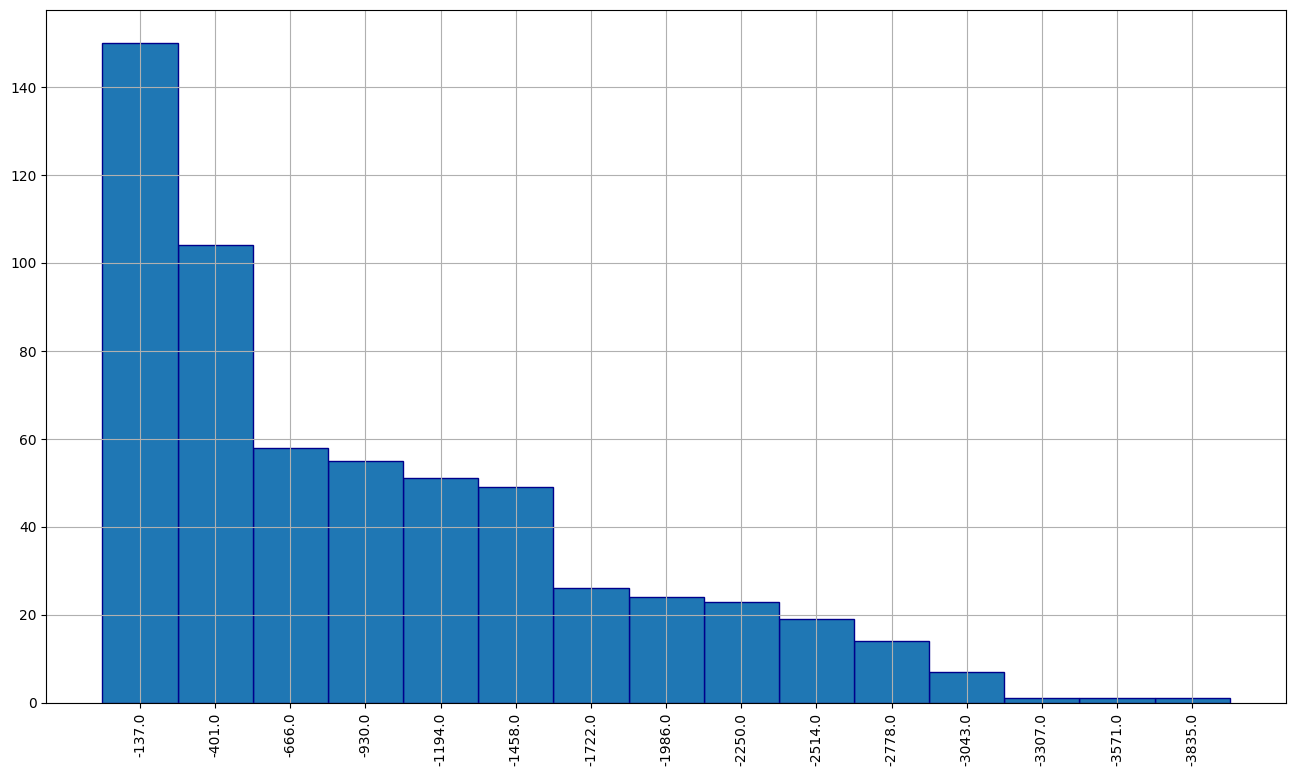

In [292]:
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(figsize=(16, 9))

grid_cnt = len(df_grids)

df_plot = df_plot[df_plot['DK_EQUITY'] < 0]
# ax.hist(df_plot['DK_EQUITY'], bins=len(df_plot), linewidth=3, edgecolor="white", cumulative=True)


# ax.hist(df_plot['DK_EQUITY'], bins=len(df_plot), linewidth=3, edgecolor="white", cumulative=True)

counts, bins = np.histogram(df_plot['DK_EQUITY'])
print(counts)
counts = counts / grid_cnt * 100
print(counts)

# height, bins, patches= plt.hist(bins[:-1], bins, weights=counts, cumulative=True, ec='k')
height, bins, patches= plt.hist(df_plot['DK_EQUITY'], bins=15, cumulative=True, ec='darkblue')

# ax.set_yticklabels(ax.yaxis.get_minorticklabels(), rotation=0)
# ax.minorticks_on()
# ax.tick_params(axis = 'both', which = 'major', labelsize = 6)
# ax.tick_params(axis = 'both', which = 'minor', labelsize = 6)
# minor_ticks = np.arange(0, 160, 1)
ax.invert_xaxis()
plt.grid(1)

# plt.bar_label(bars, fontsize=20, color='navy')

# ax.set_xticks(bins)
ticks = [(patch.get_x() + (patch.get_x() + patch.get_width()))/2 for patch in patches] ## or ticklabels

ticklabels = np.round((bins[1:] + bins[:-1]) / 2) ## or ticks

plt.xticks(ticks, ticklabels, rotation=90)


# plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.show()


In [361]:
df_origin['Profit'] = pd.to_numeric(df_origin['Profit'])
d = df_origin[(df_origin['Profit'] > 0) & (df_origin['Type'].str.startswith('balance')) & (df_origin['Comment'].str.contains('(Deposit|Transfer)'))]
d

/var/folders/9m/tth9zlt910549vvdqgrwg7rh0000gn/T/ipykernel_87492/3463290392.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  d = df_origin[(df_origin['Profit'] > 0) & (df_origin['Type'].str.startswith('balance')) & (df_origin['Comment'].str.contains('(Deposit|Transfer)'))]


,Deal,Open time,Type,Size,Item,Price,S/L,T/P,Time,Close,Commission,Swap,Profit,Comment
0,133644506,2023-02-26 22:02:32,balance,0.0,NaN,0.0,0,0.0,2023-02-26 22:02:32,0.0,0,0.0,990.00,Transfer from 21429124 19876318
1,133780686,2023-02-27 20:03:08,balance,0.0,NaN,0.0,0,0.0,2023-02-27 20:03:08,0.0,0,0.0,201980.19,Deposit CCTB 19893539
191,134447828,2023-03-03 21:45:43,balance,0.0,NaN,0.0,0,0.0,2023-03-03 21:45:43,0.0,0,0.0,644059.40,Deposit CCTB 19981222
246,134699249,2023-03-07 15:20:08,balance,0.0,NaN,0.0,0,0.0,2023-03-07 15:20:08,0.0,0,0.0,203217.50,Deposit CCTB 20035660
511,135480902,2023-03-13 22:45:18,balance,0.0,NaN,0.0,0,0.0,2023-03-13 22:45:18,0.0,0,0.0,100000.00,Transfer from 32055651 20166828
514,135486649,2023-03-14 02:05:59,balance,0.0,NaN,0.0,0,0.0,2023-03-14 02:05:59,0.0,0,0.0,200000.00,Transfer from 32055651 20168655
610,135654854,2023-03-15 00:59:21,balance,0.0,NaN,0.0,0,0.0,2023-03-15 00:59:21,0.0,0,0.0,700000.00,Transfer from 32055651 20190201
2200,137875814,2023-04-04 14:45:40,balance,0.0,NaN,0.0,0,0.0,2023-04-04 14:45:40,0.0,0,0.0,742277.22,Deposit CCTB 20558165
2227,137937211,2023-04-04 21:10:30,balance,0.0,NaN,0.0,0,0.0,2023-04-04 21:10:30,0.0,0,0.0,89929.69,Deposit CCTB 20571419
2453,138349766,2023-04-11 15:41:53,balance,0.0,NaN,0.0,0,0.0,2023-04-11 15:41:53,0.0,0,0.0,247666.69,Deposit CCTB 20661202
